# Final Project - Programming for Data Science

## Team members

1. Nguyễn Hoàng Trung Kiên - 22127478

2. Trần Thành Long - 22127250

## Dataset name

**Steam games dataset**

## Import libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Collecting data

In [67]:
df = pd.read_csv('dataset.csv')
df

,id,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,96000,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich|Steampunk|Adventure|Atmospheric|Puz...
1,262410,World of Guns: Gun Disassembly,2014.0,NaN,8.0,5.208940,2.00,NaN,28.07,26.07,Horror|First-Person|Historical|Multiplayer|Str...
2,1250410,Microsoft Flight Simulator 40th Anniversary Ed...,2020.0,91.0,6.0,3.581082,NaN,NaN,NaN,NaN,Multiplayer|Adventure|VR|Action Roguelike|Phys...
3,365450,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror|Story Rich|Hacking|Crime|Multiplayer|Dy...
4,92800,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation|Strategy|Building|Puzzle|Science|Pr...
...,...,...,...,...,...,...,...,...,...,...,...
63538,521720,Uncharted Waters,2017.0,NaN,7.0,6.000000,27.88,29.86,NaN,-27.88,Retro|RPG|Trading
63539,34311,Kid Chameleon™,2010.0,NaN,NaN,6.000000,4.38,8.15,11.17,6.79,Retro|Platformer
63540,34289,Fatal Labyrinth™,2010.0,NaN,7.0,5.000000,4.00,4.58,4.60,0.60,RPG
63541,628150,Sangokushi Eiketsuden,2017.0,NaN,6.0,3.153846,NaN,NaN,NaN,NaN,RPG


### What subject is your data about? What is the source of your data?

### Do authors of this data allow you to use like this? ###

### How did authors collect data? ###

## 2. Exploring data and preprocessing

### How many rows and how many columns?

In [68]:
df.shape

(63543, 11)

- Answer: There are ```63543``` rows and ```11``` columns

### What is the meaning of each row?

### Are there duplicated rows?

In [69]:
df.duplicated().sum()

np.int64(0)

- Answer: There are no duplicates row.

### What is the meaning of each column?

### What is the current data type of each column? Are there columns having inappropriate data types?

In [70]:
df.dtypes

id                         int64
name                      object
year                     float64
metacritic_rating        float64
reviewer_rating          float64
positivity_ratio         float64
to_beat_main             float64
to_beat_extra            float64
to_beat_completionist    float64
extra_content_length     float64
tags                      object
dtype: object

- Answer: ```Year``` should be in ```date``` data type.

### With each numerical column, how are values distributed?

- What is the percentage of missing values?

In [71]:
numerical_cols = ['id', 'year', 'metacritic_rating', 'reviewer_rating', 'positivity_ratio', 'to_beat_main', 'to_beat_extra', 'to_beat_completionist', 'extra_content_length']
missing_data = {numerical_col: sum(value == "?" or value != value for value in df[numerical_col]) / len(df[numerical_col]) * 100 for numerical_col in df[numerical_cols]}
for k, v in missing_data.items():
    print(f'{k}: {v} %')

id: 0.0 %
year: 0.1573737469115402 %
metacritic_rating: 93.83724407094408 %
reviewer_rating: 29.765670490848716 %
positivity_ratio: 3.167933525329304 %
to_beat_main: 71.98589931227673 %
to_beat_extra: 78.86942700218749 %
to_beat_completionist: 74.7635459452654 %
extra_content_length: 66.66509292919756 %


- Min? max? Are they abnormal?

### With each categorical column, how are values distributed?

- What is the percentage of missing values?

In [72]:
categorical_cols = ['name', 'tags']
missing_data = {cate_col: sum(value == "?" or value != value for value in df[cate_col]) / len(df[cate_col]) * 100 for cate_col in df[categorical_cols]}
for k, v in missing_data.items():
    print(f'{k}: {v} %')

name: 0.0 %
tags: 0.0 %


- How many different values? Show a few

In [ ]:
distinct_values = df[['name', 'tags']].nunique()
print(distinct_values)

distinct_values_name = df['name'].unique()[:5]  
distinct_values_tags = df['tags'].unique()[:5]  

print("Distinct 'name' values:", distinct_values_name)
print("Distinct 'tags' values:", distinct_values_tags)


name    63186
tags    54024
dtype: int64
Distinct 'name' values: ['POSTAL' 'Carmageddon Max Pack' 'Half-Life' 'Half-Life: Opposing Force'
 'Legacy of Kain: Soul Reaver']
Distinct 'tags' values: ['Horror|Multiplayer|Level Editor|Action|Atmospheric|Isometric|Gore|Surreal|Psychological Horror|Top-Down|Comedy|Villain Protagonist|Mature|Top-Down Shooter|Classic|Twin Stick Shooter|Funny|Indie|Dark Humor|Linear|Shooter|Singleplayer|Dark Comedy|Psychological|Hand-drawn|Violent|Dark|Anime|Third Person|Family Friendly|Difficult|Open World'
 'Combat Racing|Classic|Racing|Arcade|Multiplayer|Indie|Retro|Gore|Action|Vehicular Combat|Female Protagonist|Great Soundtrack|Singleplayer'
 'Story Rich|First-Person|Action-Adventure|Multiplayer|Action|Adventure|Silent Protagonist|Atmospheric|Gore|FPS|Classic|Funny|Moddable|Retro|Linear|Shooter|Singleplayer|PvP|Aliens|Difficult|Great Soundtrack|Sci-fi'
 'First-Person|Story Rich|Action|Adventure|Military|Silent Protagonist|Atmospheric|Puzzle|Free to Play|Gore|

- Are they abnormal?

# 3. Asking meaningful questions

# 4. Preprocessing and analyzing data to answer each question

- Sort the dataset by year

In [73]:
df = df.sort_values(by='year', ascending=True, ignore_index=True)

C:\Users\Ping\AppData\Local\Temp\ipykernel_8500\3339644551.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = df.groupby('year').apply(lambda group: group.isnull().mean() * 100)


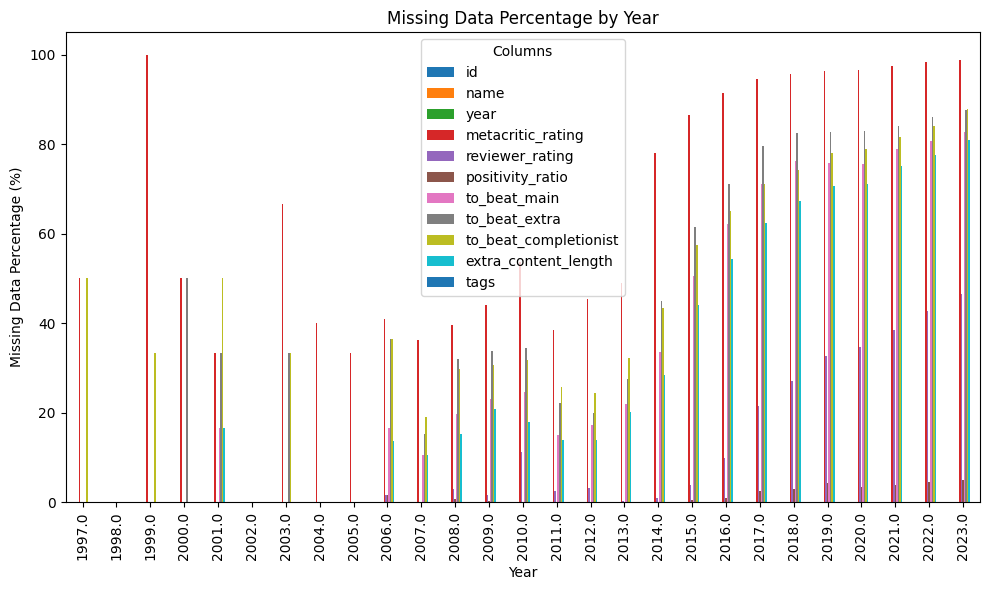

In [74]:
missing_by_year = df.groupby('year').apply(lambda group: group.isnull().mean() * 100)
missing_by_year.plot(kind='bar', figsize=(10, 6), stacked=False)
plt.title('Missing Data Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Missing Data Percentage (%)')
plt.legend(title='Columns')
plt.tight_layout()
plt.show()

In [75]:
missing_by_year

,id,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
year,,,,,,,,,,,
1997.0,0.0,0.0,0.0,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.0
1998.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1999.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.0
2000.0,0.0,0.0,0.0,50.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.0
2001.0,0.0,0.0,0.0,33.333333,0.000000,0.000000,16.666667,33.333333,50.000000,16.666667,0.0
2002.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2003.0,0.0,0.0,0.0,66.666667,0.000000,0.000000,0.000000,33.333333,33.333333,0.000000,0.0
2004.0,0.0,0.0,0.0,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2005.0,0.0,0.0,0.0,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


# 5. Reflection